# Evaluation Project 3 - Avocado

Objective - To develop a model to predict 1)City/Region of observation 2) Average sales

Approach : There are different targets variable & both require different approach:
A - For predicting City/Region - Classification approach will be suitable
B - For predicting price - Regression approach will be suitable

# Importing required libraries

In [70]:
# All major libraries are imported using pyforest

# Importing Dataset

In [134]:
av = pd.read_csv('avocado.csv')

<IPython.core.display.Javascript object>

# Loading Datset

In [135]:
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Performing EDA

In [136]:
av.columns # Checking all column names

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [137]:
av.drop(['Unnamed: 0','Date'],axis =1, inplace =True) # dropping the two columns
av.replace(0,np.NaN, inplace = True) # To check 

<IPython.core.display.Javascript object>

In [138]:
for col in ['4046','4225','4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']:
    av[col].fillna(av[col].mean(), inplace =True) # Filling all "0"s with mean values of each column

In [139]:
av.shape # checking data shape 

(18249, 12)

In [140]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


<IPython.core.display.Javascript object>

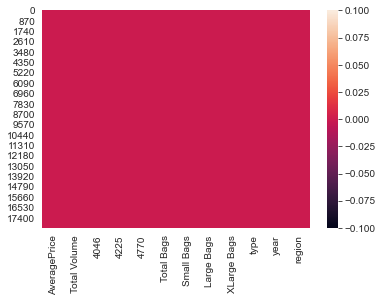

In [141]:
# To confirm null values visually
sns.heatmap(av.isnull())

In [142]:
# Yearly mean prices
av.groupby('year')['AveragePrice'].mean() 

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [143]:
av.groupby('type')['AveragePrice'].mean()  # Mean prices of each type of produce

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [144]:
# Yield of different type each year
av.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [151]:
list = ['AveragePrice', 'Total Volume','type', 'region']
for i in list:
    print(f'In column {i} min value is {av[i].min()}')

In column AveragePrice min value is 0.44
In column Total Volume min value is 84.56
In column type min value is conventional
In column region min value is Albany


In [152]:
list = ['AveragePrice', 'Total Volume', 'type', 'region']
for i in list:
    print(f'In column {i} max value is {av[i].max()}')

In column AveragePrice max value is 3.25
In column Total Volume max value is 62505646.52
In column type max value is organic
In column region max value is WestTexNewMexico


In [154]:
av.describe() # To check statistical summary

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.969462e+05,2.961445e+05,3.268525e+04,2.398363e+05,1.837961e+05,6.244825e+04,9141.941192,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.064126e+05,9.862184e+05,7.459830e+05,2.430611e+05,17154.842200,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,3.786500e+02,5.108010e+03,3.125050e+03,9.187500e+02,4489.840000,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.111933e+04,3.992521e+04,2.787623e+04,7.942080e+03,9141.941192,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,3.268525e+04,1.112384e+05,8.620928e+04,6.244825e+04,9141.941192,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [155]:
av.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648404
4225             8.942752
4770            10.188362
Total Bags       9.756195
Small Bags       9.541851
Large Bags       9.807586
XLarge Bags     13.348825
year             0.215339
dtype: float64

# Visualization

Univariate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

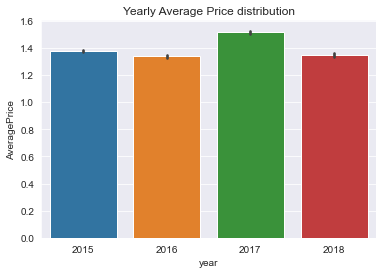

In [162]:
sns.barplot(x = 'year', y = 'AveragePrice', data = av)
plt.title('Yearly Average Price distribution')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

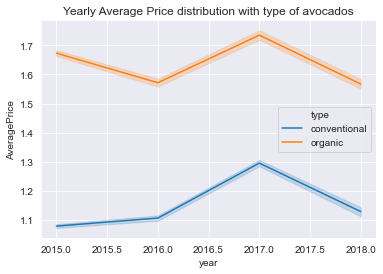

In [163]:
sns.lineplot(x = 'year', y = 'AveragePrice', hue = 'type' , data = av)
plt.title('Yearly Average Price distribution with type of avocados')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

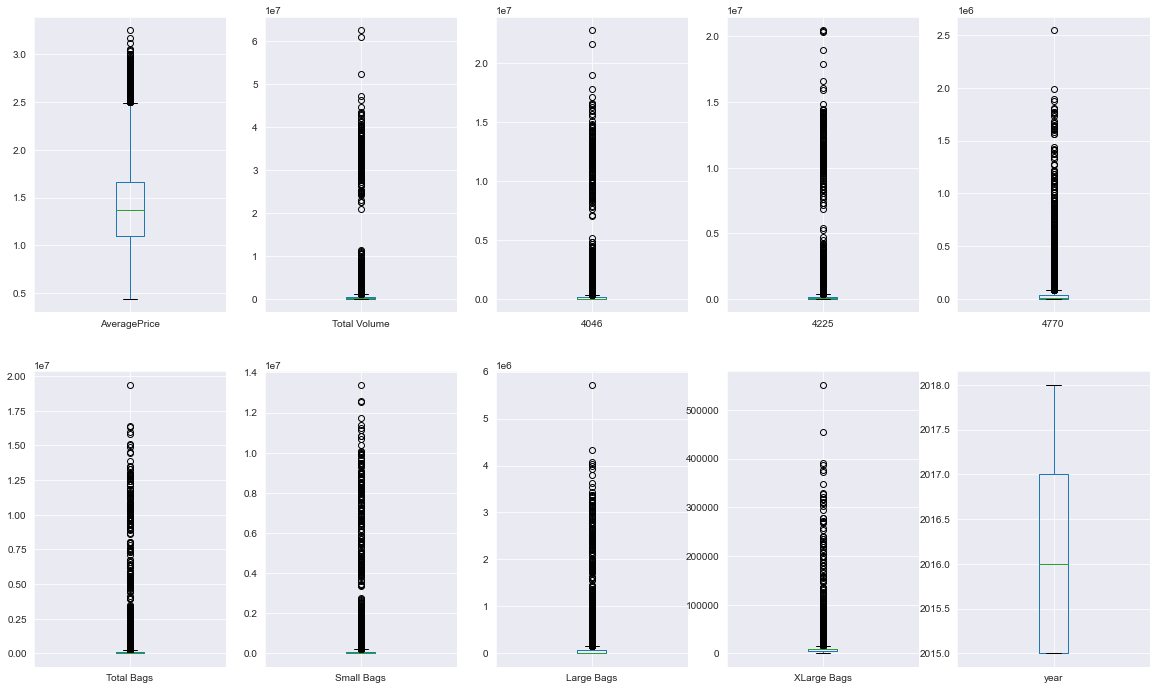

In [164]:
av.plot( kind = 'box', subplots = True, layout =(4,5), figsize=(20,25))
sns.set_style('darkgrid')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

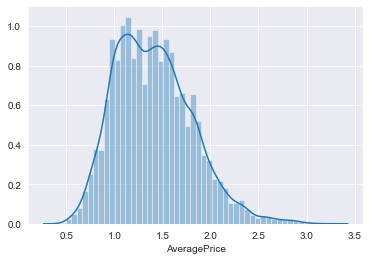

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

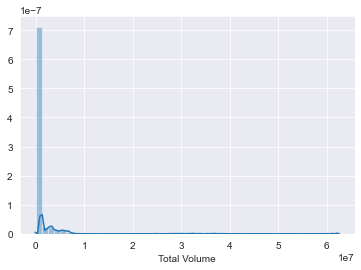

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

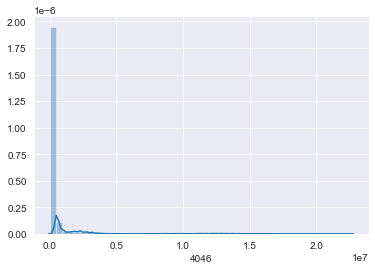

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

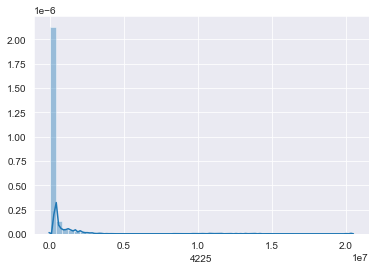

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

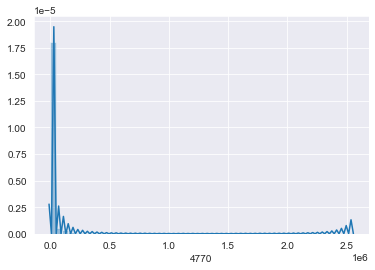

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

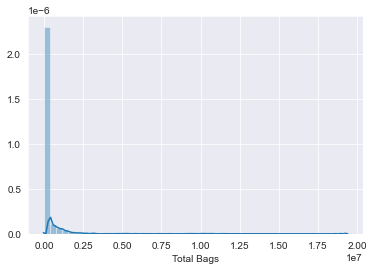

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

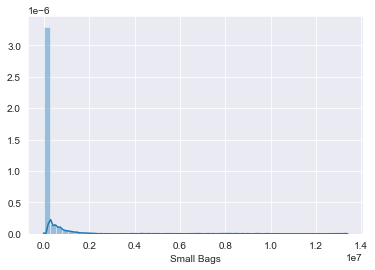

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

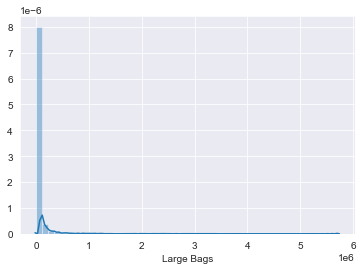

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

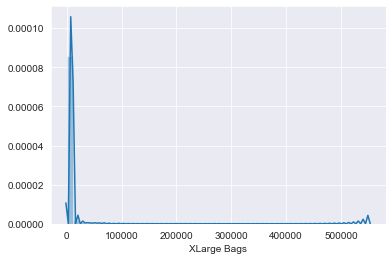

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

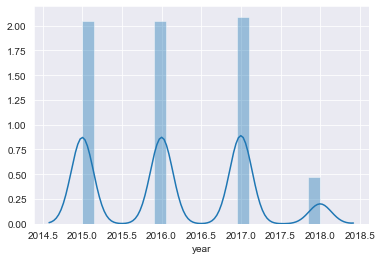

In [165]:
for i in av.describe().columns:
    sns.distplot(av[i])
    plt.show()

In [170]:
# Encoding columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
av['type'] = le.fit_transform(av['type'].astype(str))
av['region'] = le.fit_transform(av['region'].astype(str))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

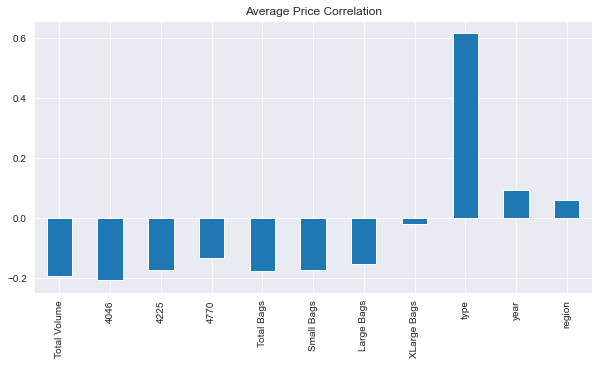

In [171]:
#Checking coorelation
plt.figure(figsize = (10,5))
av.drop('AveragePrice',axis=1).corrwith(av['AveragePrice']).plot(kind='bar')
plt.title('Average Price Correlation')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

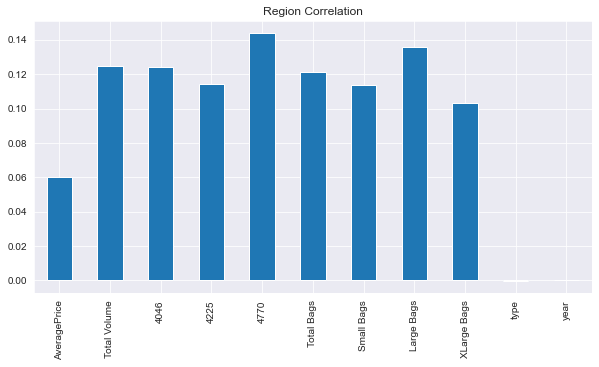

In [172]:
#Checking coorelation
plt.figure(figsize = (10,5))
av.drop('region',axis=1).corrwith(av['region']).plot(kind='bar')
plt.title('Region Correlation')
plt.show()

In [175]:
av_1 = av.copy()

In [176]:
# Rectifying skewness closer to zero
list = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags','Large Bags','XLarge Bags']
for i in list:
    if av_1[i].skew()>0.01:
        av_1[i]=np.log1p(av_1[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [177]:
# To calculate Z score
from scipy.stats import zscore
z = np.abs(zscore(av_1))
threshold = 3
print(np.where(z<3))
print(av_1.shape)
new_av= av_1[(z<3).all(axis=1)]
print(new_av.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(18249, 12)
(17520, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

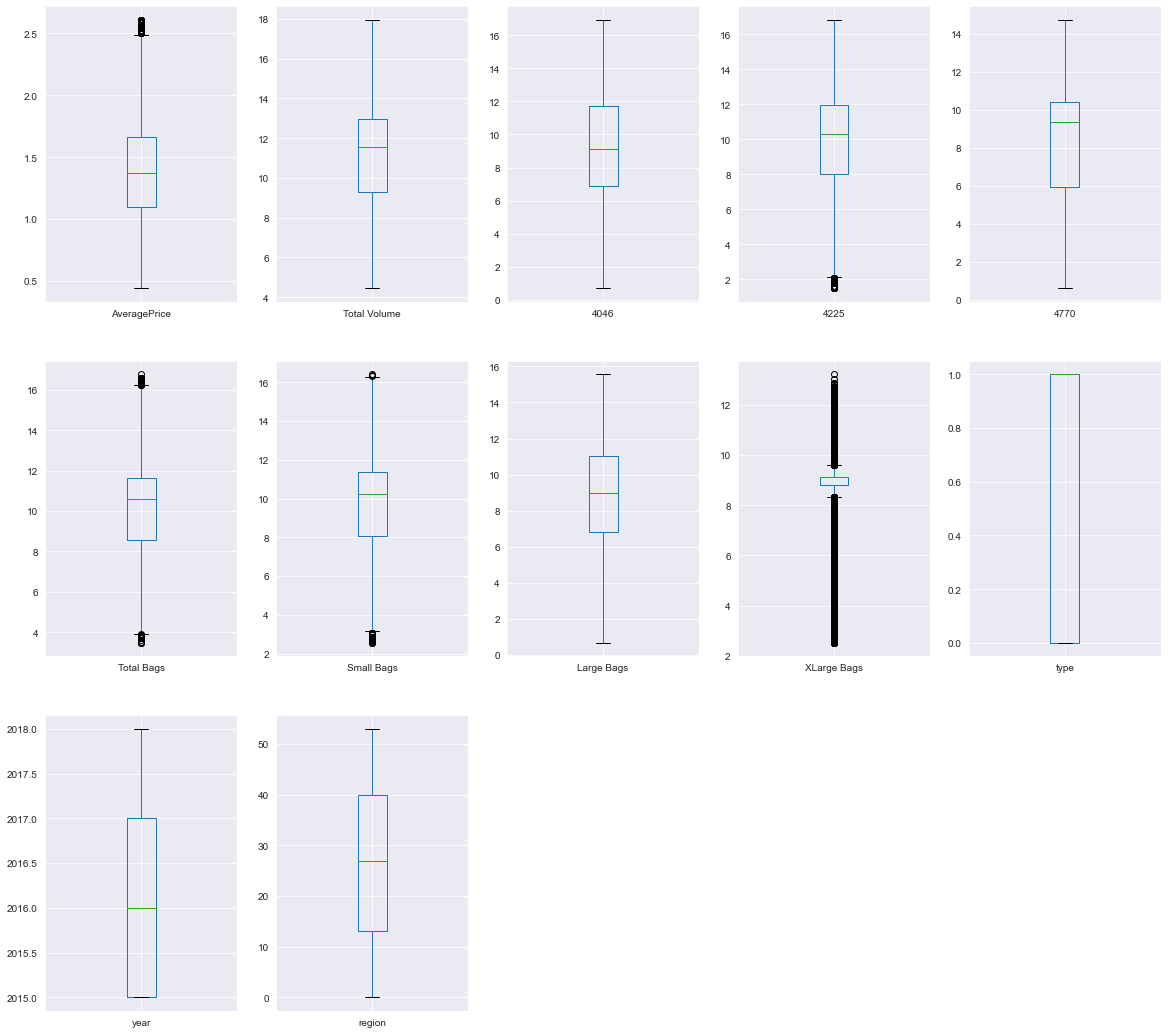

In [178]:
# Rechecking the outliers
new_av.plot( kind = 'box', subplots = True, layout =(4,5), figsize=(20,25))
sns.set_style('darkgrid')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

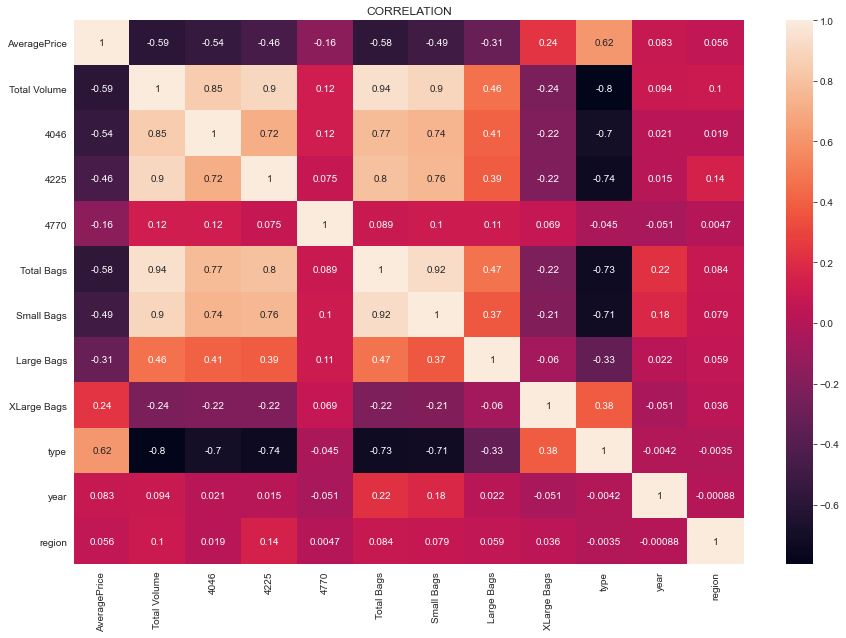

In [182]:
cor_new_av = new_av.corr()
plt.figure(figsize=(15,10))
plt.title('CORRELATION')
sns.heatmap(cor_new_av, annot = True)
plt.show()

# Building model

In [183]:
#Importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import xgboost
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor

# Regression Model

In [184]:
# Defining independent & dependent variables for both approaches
x = new_av.drop(['AveragePrice'], axis=1)
y = pd.DataFrame(new_av['AveragePrice'])
ssc = StandardScaler()
x = ssc.fit_transform(x)

<IPython.core.display.Javascript object>

In [185]:
print(x.shape)
print(y.shape)

(17520, 11)
(17520, 1)


In [194]:
# identifying best random state
best_random_state = 0
accu = 0
for i in range(30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    r2s = r2_score(y_test,predlr)
    if r2s > accu:
        accu = r2s
        best_random_state = i
        
        
print(f'The best random state is {best_random_state} with accuracy is {round(accu *100)}%')

The best random state is 80 with accuracy is 56.0%


In [196]:
# Identifying best algorithm with identified random state
import warnings
warnings.filterwarnings('ignore')
list=[LinearRegression(),Lasso(alpha = 0.0001),Ridge(alpha = 0.0001), 
      ElasticNet(alpha = 0.0001), KNeighborsRegressor(), RandomForestRegressor(), AdaBoostRegressor(), 
      DecisionTreeRegressor(), xgboost.XGBRegressor(), GradientBoostingRegressor()]
for m in list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 80)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} R2 Score is {r2_score(y_test,pred)*100}\n')

For algorithm LinearRegression() R2 Score is 55.50028731144372

For algorithm Lasso(alpha=0.0001) R2 Score is 55.47472405679488

For algorithm Ridge(alpha=0.0001) R2 Score is 55.50028706697652

For algorithm ElasticNet(alpha=0.0001) R2 Score is 55.4856710688479

For algorithm KNeighborsRegressor() R2 Score is 82.37094350621597

For algorithm RandomForestRegressor() R2 Score is 85.35889437510983

For algorithm AdaBoostRegressor() R2 Score is 50.159592029913505

For algorithm DecisionTreeRegressor() R2 Score is 68.81126922223673

For algorithm XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0

In [238]:
#Checking for best parameters for regressor algorithms
parameters = {'n_estimators':[0,10], 'criterion': ['mse', 'mae']}
rfr = RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'mse', 'n_estimators': 10}

In [242]:
# Developing model with default parameters
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .1, random_state = 80)
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfrpred = rfr.predict(x_test)
print('R2 Score is = ',r2_score(y_test,rfrpred)*100)
print('Mean Sq. Error = ',mean_squared_error(y_test,rfrpred))
print('Mean abs. Error = ',mean_absolute_error(y_test,rfrpred))
cvscore = cross_val_score(rf,x,y,cv =10).mean()
print('cv score is =',cvscore)

R2 Score is =  85.39789976919955
Mean Sq. Error =  0.02241652804794521
Mean abs. Error =  0.10212682648401826
cv score is = 0.35507474788051924


# Classification Model

In [205]:
# Identifying best Classification model
list=[LogisticRegression(),KNeighborsClassifier(), RandomForestClassifier(),AdaBoostClassifier(), 
      DecisionTreeClassifier(), xgboost.XGBClassifier(), GradientBoostingClassifier()]
x1 = new_av.drop(['region'], axis=1)
y1 = new_av['region']
print(x1.shape)
print(y1.shape)
from sklearn.preprocessing import power_transform
x1 = power_transform(x,method = 'yeo-johnson')
for m in list:
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25, random_state = 80)
    m.fit(x1_train,y1_train)
    pred = m.predict(x1_test)
    cv_score = cross_val_score(m,x1,y1,cv= 10).mean()
    print(f'For algorithm {m} Accuracy Score is {accuracy_score(y1_test,pred)*100}')

(17520, 11)
(17520,)
For algorithm LogisticRegression() Accuracy Score is 76.98630136986301
For algorithm KNeighborsClassifier() Accuracy Score is 93.2420091324201
For algorithm RandomForestClassifier() Accuracy Score is 99.52054794520548
For algorithm AdaBoostClassifier() Accuracy Score is 34.52054794520548
For algorithm DecisionTreeClassifier() Accuracy Score is 100.0
[22:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:5

KeyboardInterrupt: 

In [211]:
# Building the model
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25, random_state = 80)
dtc = DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
pred = dtc.predict(x1_test)
print(f'For algorithm {m} Accuracy Score is {accuracy_score(y1_test,pred)*100}')
print(f'Confusion matrix is \n {confusion_matrix(y1_test,pred)}')
print(f'Classification report is \n {classification_report(y1_test,pred)}')

For algorithm GradientBoostingClassifier() Accuracy Score is 100.0
Confusion matrix is 
 [[77  0  0 ...  0  0  0]
 [ 0 92  0 ...  0  0  0]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 88  0  0]
 [ 0  0  0 ...  0 85  0]
 [ 0  0  0 ...  0  0 94]]
Classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00        88
           6       1.00      1.00      1.00        89
           7       1.00      1.00      1.00        83
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        67
          10       1.00      1.00      1.00        77
          11       1.00      1.00      1.00        84
          12       1.00  

In [229]:
y1_pred = dtc.predict(x1)
y_pred = rfr.predict(x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

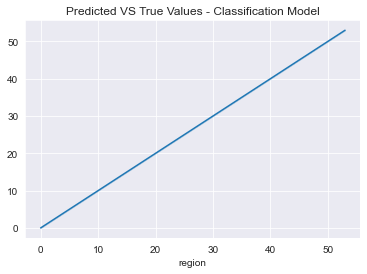

In [235]:
sns.lineplot(y1,y1_pred)
plt.title('Predicted VS True Values - Classification Model')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

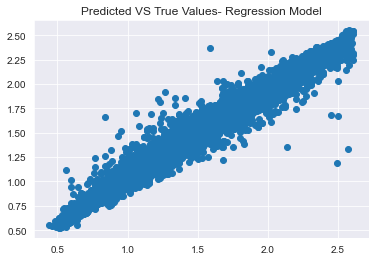

In [236]:
plt.scatter(y,y_pred)
plt.title('Predicted VS True Values- Regression Model')
plt.show()

# Saving The Best Models

In [221]:
import joblib
joblib.dump(rfr,'Price Pridiction.obj')

['Price Pridiction.obj']

In [222]:
joblib.dump(dtc,'Region Prediction.obj')

['Region Prediction.obj']